In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import hvplot.pandas #this is for reference only 
import scipy.stats as st
from scipy.stats import linregress

In [148]:
tor_df = pd.read_csv("../Data/tor_data_chrisEdit.csv")
tor_df=tor_df[["Restaurant Name", "Rating", "Longitude", "Latitude", "Distance"]].dropna(how="any")
van_df= pd.read_csv("../Data/van_data_ChrisEdit.csv")
van_df=van_df[["Restaurant Name", "Rating", "Longitude", "Latitude", "Distance"]].dropna(how="any")

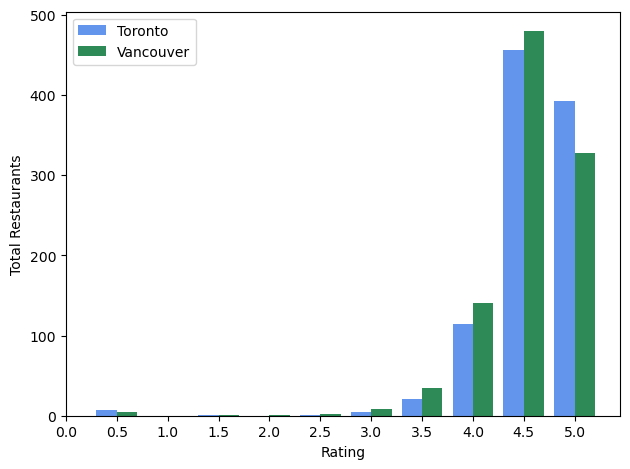

Toronto NormaltestResult(statistic=710.5969813838792, pvalue=4.96393474763195e-155)
Vancouver NormaltestResult(statistic=589.8227297653107, pvalue=8.348752392074616e-129)


In [149]:
n_bins = 10
fig, (ax) = plt.subplots()
x_axis=np.arange(0, 5.5, .5)

x_multi = [tor_df['Rating'], van_df['Rating']]
plt.xlabel("Rating")
plt.ylabel("Total Restaurants")
ax.hist(x_multi, n_bins, label=["Toronto", "Vancouver"], histtype='bar', color=["cornflowerblue", "seagreen"], width=.2, align="right")
plt.legend(loc="upper left")
plt.xticks(x_axis)
fig.tight_layout()
plt.show()
normal_t=st.normaltest(tor_df['Rating'].sample(len(tor_df['Rating'])))
print(f"Toronto {normal_t}")
normal_v=st.normaltest(van_df['Rating'].sample(len(van_df['Rating'])))
print(f"Vancouver {normal_v}")

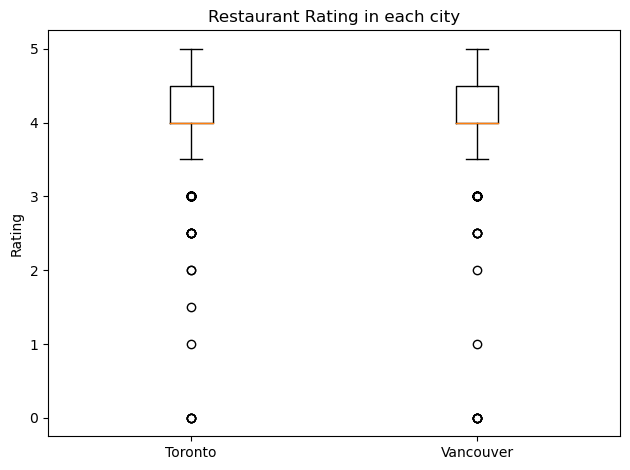

In [150]:
fig1, ax1 = plt.subplots()
ax1.set_title('Restaurant Rating in each city')
ax1.set_ylabel('Rating')
ax1.boxplot([van_df["Rating"], tor_df["Rating"]])
plt.xticks([1, 2], ["Toronto", "Vancouver"])
fig1.tight_layout()
plt.show()


In [151]:
tquartiles = tor_df["Rating"].quantile([.25,.5,.75])
tlowerq = tquartiles[0.25]
tupperq = tquartiles[0.75]
tiqr = tupperq-tlowerq

print("For the city of Toronto")
print(f"The lower quartile is: {tlowerq}")
print(f"The upper quartile is: {tupperq}")
print(f"The interquartile range is: {tiqr}")
print(f"The the median is: {tquartiles[0.5]} ")

tlower_bound = tlowerq - (1.5*tiqr)
tupper_bound = tupperq + (1.5*tiqr)
print(f"Values below {tlower_bound} could be outliers.")
print(f"Values above {tupper_bound} could be outliers, which is not possible.")

vquartiles = van_df["Rating"].quantile([.25,.5,.75])
vlowerq = vquartiles[0.25]
vupperq = vquartiles[0.75]
viqr = vupperq-vlowerq

print("\nFor the city of Vancouver")
print(f"The lower quartile is: {vlowerq}")
print(f"The upper quartile is: {vupperq}")
print(f"The interquartile range is: {viqr}")
print(f"The the median is: {vquartiles[0.5]} ")

vlower_bound = vlowerq - (1.5*viqr)
vupper_bound = vupperq + (1.5*viqr)
print(f"Values below {vlower_bound} could be outliers.")
print(f"Values above {vupper_bound} could be outliers, which is not possible.")

For the city of Toronto
The lower quartile is: 4.0
The upper quartile is: 4.5
The interquartile range is: 0.5
The the median is: 4.0 
Values below 3.25 could be outliers.
Values above 5.25 could be outliers, which is not possible.

For the city of Vancouver
The lower quartile is: 4.0
The upper quartile is: 4.5
The interquartile range is: 0.5
The the median is: 4.0 
Values below 3.25 could be outliers.
Values above 5.25 could be outliers, which is not possible.


In [152]:
# For reference only
# map_plot_1 = tor_df.hvplot.points(
#     "Longitude",
#     "Latitude",
#     geo = True,
#     tiles = "OSM",
#     size="Rating",
#     color = "Restaurant Name",
#     frame_width = 800,
#     frame_height = 400    
# )

# map_plot_1

In [153]:
# For reference only
# map_plot_2 = van_df.hvplot.points(
#     "Longitude",
#     "Latitude",
#     geo = True,
#     tiles = "OSM",
#     size="Rating",
#     color = "Restaurant Name",
#     frame_width = 800,
#     frame_height = 400    
# )

# map_plot_2


The r-squared is: 0.016820481368420633
PearsonRResult(statistic=0.12969379849638393, pvalue=3.966754766151683e-05)


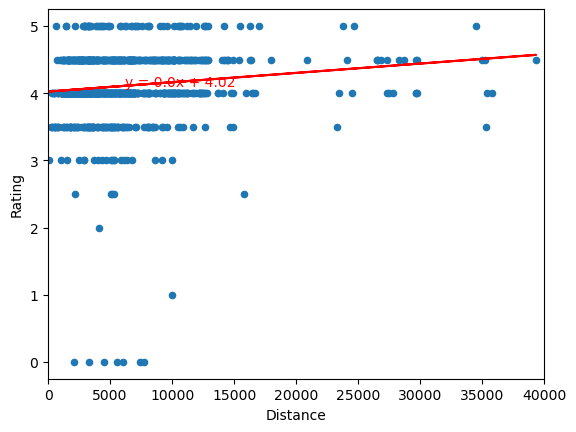

In [154]:
tor_df.plot(kind="scatter", x="Distance", y="Rating", xlim=(0, 40000))
torcorrelation = st.pearsonr(tor_df["Distance"], tor_df["Rating"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(tor_df["Distance"], tor_df["Rating"])
regress_values = tor_df["Distance"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(tor_df["Distance"],regress_values,"r-")
plt.annotate(line_eq,(tor_df["Distance"].mean(),tor_df["Rating"].mean()),fontsize=10,color="red")

print(f"The r-squared is: {rvalue**2}")
print(torcorrelation)

The r-squared is: 0.000881199587707198
PearsonRResult(statistic=0.02968500610926668, pvalue=0.34837038519649094)


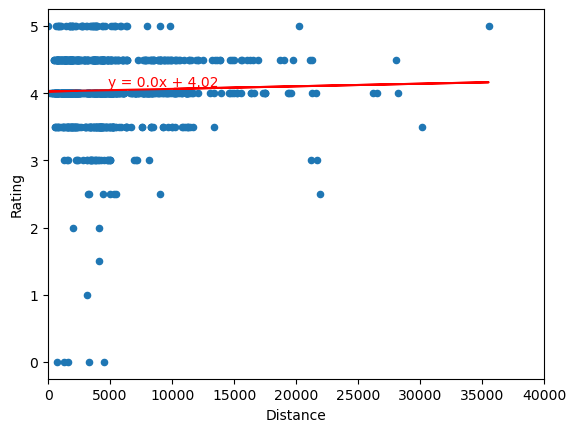

In [155]:
van_df.plot(kind="scatter", x="Distance", y="Rating", xlim=(0, 40000))
vancorrelation = st.pearsonr(van_df["Distance"], van_df["Rating"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(van_df["Distance"], van_df["Rating"])
regress_values = van_df["Distance"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(van_df["Distance"],regress_values,"r-")
plt.annotate(line_eq,(van_df["Distance"].mean(),tor_df["Rating"].mean()),fontsize=10,color="red")

print(f"The r-squared is: {rvalue**2}")
print(vancorrelation)